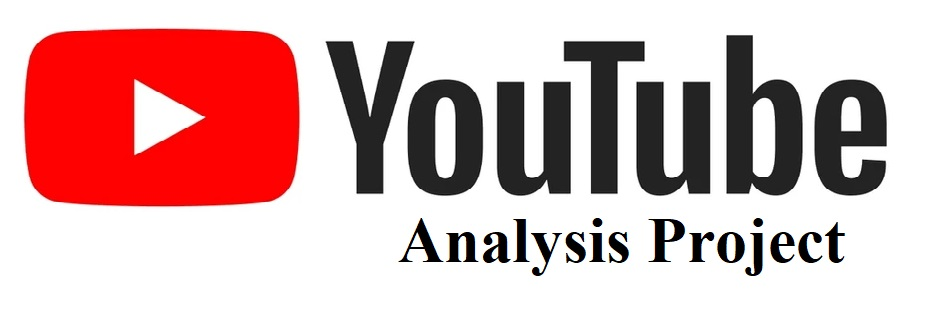

Welcome to our YouTube Analysis Project! With over 1 billion hours of content watched daily, YouTube stands as the second most visited site globally, captivating 44% of internet users. Furthermore, an impressive 37% of mobile internet traffic is dedicated to this platform. In this project, we aim to delve into the vast trove of YouTube data using powerful Python libraries. We'll analyze viewership trends, user engagement metrics, content performance, and much more, uncovering valuable insights into one of the internet's most influential platforms. Join us as we embark on this journey to decode the dynamics of YouTube through data analysis!

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading csv data

In [4]:
comments = pd.read_csv(r"E:\Youtube/UScomments.csv" , on_bad_lines='warn')

Skipping line 41589: expected 4 fields, saw 11
Skipping line 51628: expected 4 fields, saw 7
Skipping line 114465: expected 4 fields, saw 5

Skipping line 142496: expected 4 fields, saw 8
Skipping line 189732: expected 4 fields, saw 6
Skipping line 245218: expected 4 fields, saw 7

Skipping line 388430: expected 4 fields, saw 5

C:\Users\ROHAN\AppData\Local\Temp\ipykernel_28740\3583590767.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv(r"E:\Youtube/UScomments.csv" , on_bad_lines='warn')


In [5]:
comments.head()

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0

In [6]:
comments.shape

(691400, 4)

In [7]:
comments.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [8]:
comments.dropna(inplace = True)

### Sentiment analysis

Polarity from -1 to 1 has been given with the help of TextBlob. It helps to segregate the comments into positive, negative and neutral sentiments. It helps the organization to hit the target audience in a more specified manner

In [9]:
!pip install textblob

In [10]:
from textblob import TextBlob

In [11]:
polarity = []
for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [12]:
comments['Polarity'] = polarity

In [13]:
comments.head()

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  Polarity  
0       0       0.0  
1       0       0.0  
2       0       0.0  
3       0       0.0  
4       0       0.0

In [14]:
Sentiment = []
for i in comments['Polarity']:
    if i > 0:
        Sentiment.append('Positive')
    elif i == 0:
        Sentiment.append('Neutral')
    else:
        Sentiment.append('Negative')

In [15]:
comments['Sentiment'] = Sentiment

In [16]:
comments.head()

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  Polarity Sentiment  
0       0       0.0   Neutral  
1       0       0.0   Neutral  
2       0       0.0   Neutral  
3       0       0.0   Neutral  
4       0       0.0   Neutral

In [17]:
polarity_count = comments.groupby(by = 'Sentiment')[['Polarity']].count()
polarity_count

Polarity
Sentiment          
Negative     106154
Neutral      284424
Positive     300796

<Axes: xlabel='Sentiment', ylabel='Polarity'>

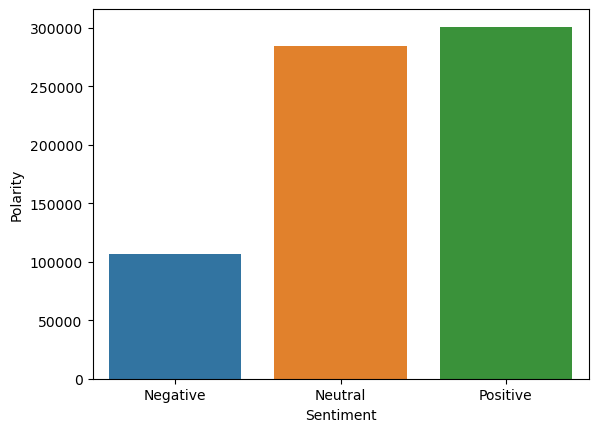

In [18]:
sns.barplot(data = polarity_count, x = polarity_count.index, y ='Polarity')

In [19]:
polarity_mean = comments.groupby(by = 'Sentiment')[['Polarity']].mean()
polarity_mean

Polarity
Sentiment          
Negative  -0.317207
Neutral    0.000000
Positive   0.428704

<Axes: xlabel='Sentiment', ylabel='Polarity'>

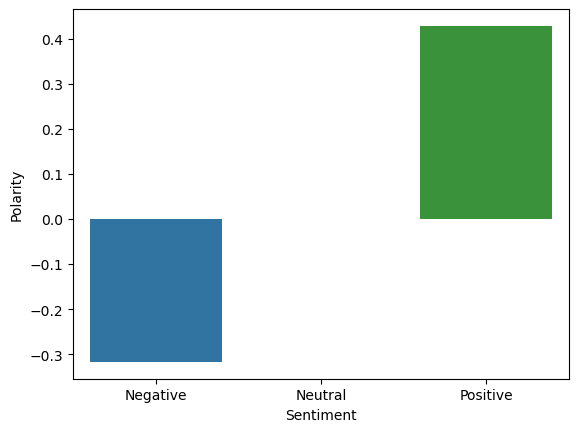

In [20]:
sns.barplot(data = polarity_mean, x = polarity_mean.index, y ='Polarity')

### Wordcloud

Wordcloud helps to know the positive and negative words used by viewers in the comment section. Such segregation helps to know the quality of the content. Positive comments would help us to increase the reach of particular videos

In [21]:
!pip install wordcloud

In [22]:
from wordcloud import WordCloud, STOPWORDS

In [23]:
comments_positive = comments[comments['Polarity'] == 1][['comment_text']]
comments_negative = comments[comments['Polarity'] == -1][['comment_text']]

In [24]:
type(comments['comment_text'])  #wordcloud takes input in the form of string, so we need to convert it into string from Series

pandas.core.series.Series

In [25]:
total_comment_positive = ' '.join(comments_positive['comment_text'])
total_comment_negative = ' '.join(comments_negative['comment_text'])

In [26]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [27]:
wordcloud_positive = WordCloud(stopwords = set(STOPWORDS)).generate(total_comment_positive)

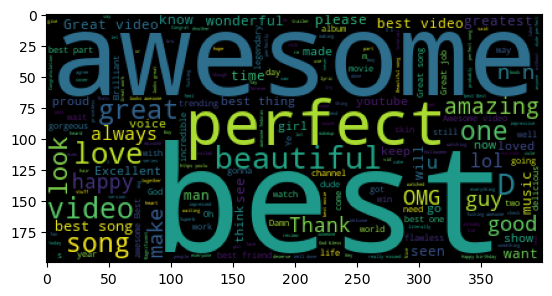

In [28]:
plt.imshow(wordcloud_positive)

In [29]:
wordcloud_negative = WordCloud(stopwords = set(STOPWORDS)).generate(total_comment_negative)

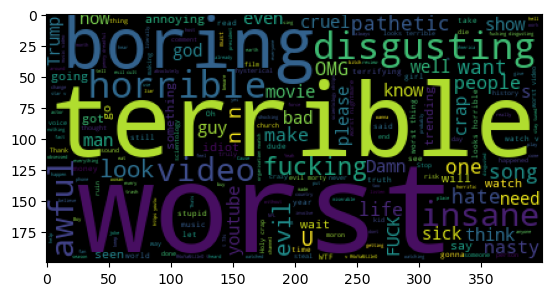

In [30]:
plt.imshow(wordcloud_negative)

### Emoji Analysis

Emoji analysis makes the comments segregation easier. Emojis helps us to know the content quality and makes it easier for Youtube to increase its reach 

In [31]:
!pip install emoji==2.2.0

In [32]:
import emoji

In [33]:
emoji.__version__

'2.2.0'

In [34]:
comments['comment_text'].head()

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
Name: comment_text, dtype: object

In [35]:
comment = 'trending 😉'
[i for i in comment if i in emoji.EMOJI_DATA]
        

['😉']

In [36]:
all_emojis_list = []
for comment in comments['comment_text']:
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emojis_list.append(char)

In [37]:
from collections import Counter

In [38]:
Counter(all_emojis_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [39]:
emojis = [Counter(all_emojis_list).most_common(10)[i][0] for i in range(10)]

In [40]:
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [41]:
freqs = [Counter(all_emojis_list).most_common(10)[i][1] for i in range(10)]

In [42]:
freqs

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [43]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [44]:
trace =  go.Bar(x= emojis, y=freqs)

In [45]:
iplot([trace])

Since the most used emojis are positive in nature, it shows that the content is being liked by the viewers.

### Data Collection

In [46]:
import os

In [47]:
files = os.listdir(r'E:\Youtube\additional_data')

In [48]:
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [49]:
files_csv = [file for file in files if '.csv' in file]

In [50]:
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [51]:
import warnings

In [52]:
from warnings import filterwarnings

In [53]:
filterwarnings('ignore')

In [54]:
full_df = pd.DataFrame()
path = r"E:\Youtube\additional_data"

for file in files_csv:
    current_df = pd.read_csv(path + "/" + file, encoding = 'iso-8859-1', on_bad_lines = 'warn')
    full_df = pd.concat([full_df, current_df], ignore_index = True)

In [55]:
full_df.shape

(375942, 16)

### Transforming data

In [56]:
full_df[full_df.duplicated()].shape

(36417, 16)

In [57]:
full_df.drop_duplicates(inplace=True)

In [58]:
full_df.shape

(339525, 16)

### Exporting bulk data in csv, json, databases

In [59]:
#full_df.to_csv(r'E:\Youtube\Full_data/youtube_sample.csv', index = False)

In [60]:
#full_df.to_json(r'E:\Youtube\Full_data/youtube_sample.json')

In [61]:
#from sqlalchemy import create_engine

In [62]:
#engine = create_engine('sqlite:///E:\Youtube\Full_data/youtube_sample.sqlite')

In [63]:
#full_df.to_sql('Users', con = engine, if_exists = 'append')

### Analysing the most liked category

In [64]:
full_df.head()

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...  
1  STill got a lot of packages. Probably will las...  
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...  
3  I know it's been a while since we did this sho...  
4  ð§: https://ad.gt/yt-perfect\nð°: https://...

In [65]:
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [66]:
json_df = pd.read_json(r'E:\Youtube\additional_data/US_category_id.json')

In [67]:
json_df.head()

kind  \
0  youtube#videoCategoryListResponse   
1  youtube#videoCategoryListResponse   
2  youtube#videoCategoryListResponse   
3  youtube#videoCategoryListResponse   
4  youtube#videoCategoryListResponse   

                                                etag  \
0  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
1  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
2  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
3  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
4  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   

                                               items  
0  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
1  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
2  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
3  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
4  {'kind': 'youtube#videoCategory', 'etag': '"m2...

In [68]:
json_df['items'][1]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
 'id': '2',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Autos & Vehicles',
  'assignable': True}}

In [69]:
cat_dict = {}
for item in json_df['items'].values:
    cat_dict[int(item['id'])] = item['snippet']['title']

In [70]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [71]:
full_df['category_name'] = full_df['category_id'].map(cat_dict)

In [72]:
full_df.head()

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  category_name  
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...          Music  
1  STill got a lot of packages. Probably will las...         Comedy  
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...         Comedy  
3  I know it's been a while since we did this sho...  Entertainment  
4  ð§: https://ad.gt/yt-perfect\nð°: https://...          Music

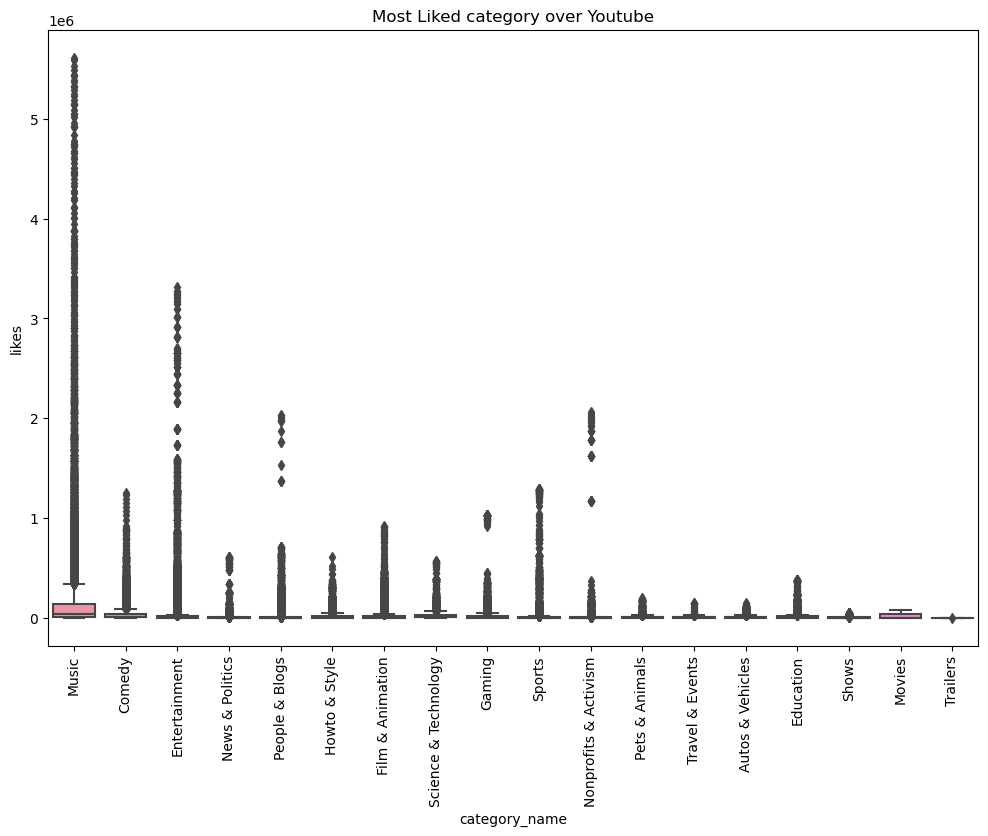

In [73]:
plt.figure(figsize = (12,8))
sns.boxplot(data = full_df, x = 'category_name', y = 'likes')
plt.xticks(rotation = 90)
plt.title('Most Liked category over Youtube')
plt.show()

Insights: Music and Entertainment being the most liked categories followed by Nonprofits & Activism, People & Blogs. Whereas Shows, Movie, Trailers placed at the bottom of the list making it the most disliked category.

### Audience Engagement over various categories

In [74]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name'],
      dtype='object')

In [75]:
full_df['like_rate'] = (full_df['likes'] / full_df['views'])*100
full_df['dislike_rate'] = (full_df['dislikes'] / full_df['views'])*100
full_df['comment_count_rate'] = (full_df['comment_count'] / full_df['views'])*100

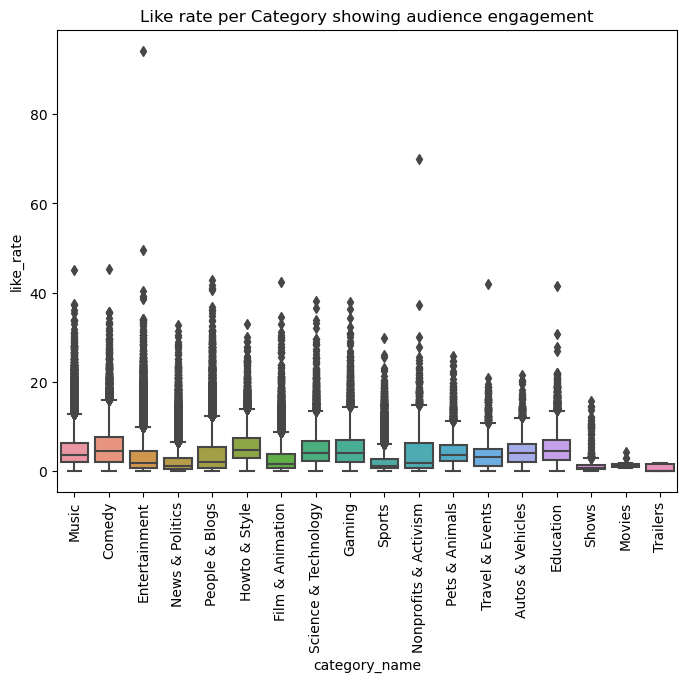

In [76]:
plt.figure(figsize = (8,6))
sns.boxplot(data=full_df, x = 'category_name', y = 'like_rate')
plt.xticks(rotation = 90)
plt.title('Like rate per Category showing audience engagement')
plt.show()

Insights: Entertainment category having the most like rate. Except for Shows, Movies and Trailers most categories have shown a significant amount of like rate

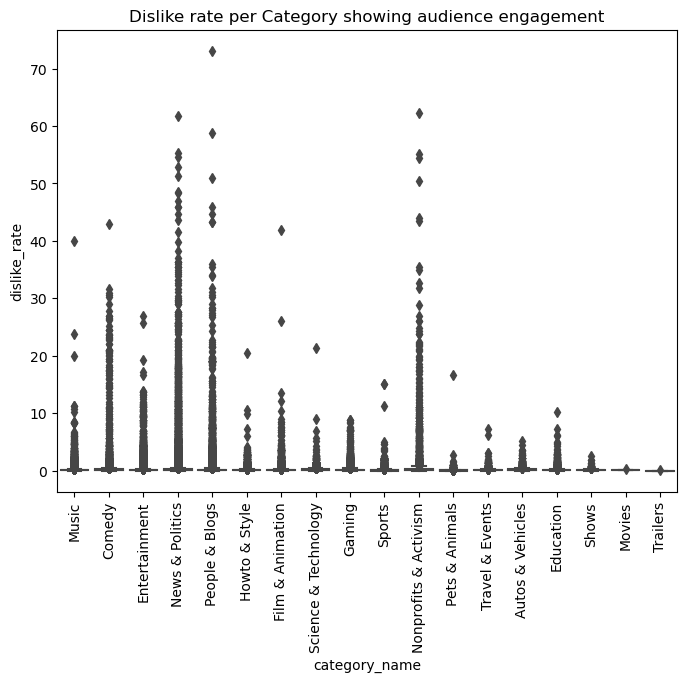

In [77]:
plt.figure(figsize = (8,6))
sns.boxplot(data=full_df, x = 'category_name', y = 'dislike_rate')
plt.xticks(rotation = 90)
plt.title('Dislike rate per Category showing audience engagement')
plt.show()

Insights: From the above boxplot, high dislie rate is evident among the most liked categories which indicates about high audience engagement having mixed sentiments. Categories such as People & Blogs, News & Politics, Nonprofits & Activism shows high dislike rate and moderate like rate.

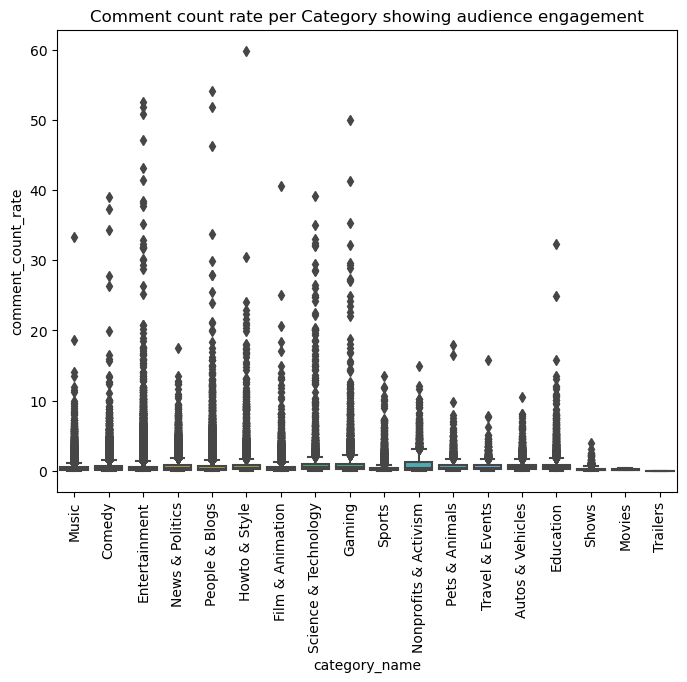

In [78]:
plt.figure(figsize = (8,6))
sns.boxplot(data=full_df, x = 'category_name', y = 'comment_count_rate')
plt.xticks(rotation = 90)
plt.title('Comment count rate per Category showing audience engagement')
plt.show()

Insights: Entertainment, People & Blogs, Science & Technology, Gaming has high coment count rate which shows that these categories has the potential to actively engage the audience.

<Axes: xlabel='views', ylabel='likes'>

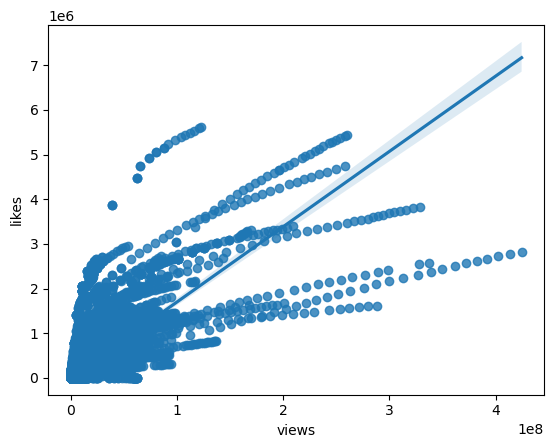

In [79]:
sns.regplot(data=full_df, x = 'views', y='likes')

In [80]:
full_df[['likes', 'dislikes', 'views']].corr()

likes  dislikes     views
likes     1.000000  0.451809  0.779531
dislikes  0.451809  1.000000  0.405428
views     0.779531  0.405428  1.000000

<Axes: >

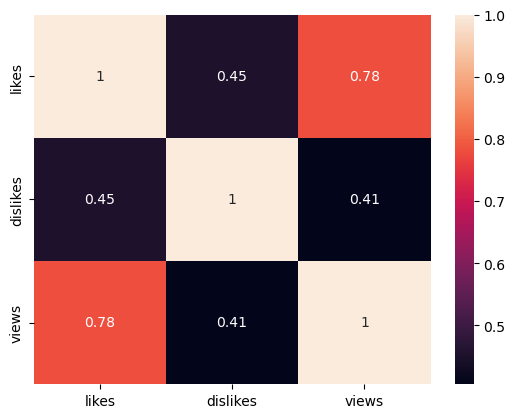

In [81]:
sns.heatmap(full_df[['likes', 'dislikes', 'views']].corr(), annot = True)

Insights: Regex plot and heatmap gives a clear understanding of high positive correlation between views and likes.

### Channels having largest number of trending videos

In [82]:
full_df.head()

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  category_name  \
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...          Music   
1  STill got a lot of packages. Probably will las...         Comedy   
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...         Comedy   
3  I know it's been a while since we did this sho...  Entertainment   
4  ð§: https://ad.gt/yt-perfect\nð°: https://...          Music   

   like_rate  dislike_rate  comment_count_rate  
0   4.589104      0.253051            0.733639  
1  12.594873      0.166363            1.284185  
2   4.575843      0.167292            0.256342  
3   6.309630      0.094903            0.835851  
4   4.874563      0.062887            0.253752

In [83]:
cdf = full_df['channel_title'].value_counts().reset_index()

In [84]:
cdf.rename(columns = {'count' : 'total_videos'}, inplace=True)

In [85]:
cdf

channel_title  total_videos
0      The Late Show with Stephen Colbert           710
1                                     WWE           643
2             Late Night with Seth Meyers           592
3                            TheEllenShow           555
4                       Jimmy Kimmel Live           528
...                                   ...           ...
37819                                Daas             1
37820                       YT Industries             1
37821      BTLV Le mÃ©dia complÃ©mentaire             1
37822                        Quem Sabia ?             1
37823                        Jessi Osorno             1

[37824 rows x 2 columns]

In [86]:
import plotly.express as px

In [87]:
px.bar(data_frame = cdf[0:20], x = 'channel_title', y='total_videos')

Insights: Channels from entertainment category being the topmost liked content. The Late Show with Stephen Colbert, WWE, Late Night with Seth Meyers, TheEllenShow securing the best four channels.

### Impact of punctuations on likes, dislikes, views

In [88]:
import string

In [89]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [90]:
full_df['title'][0]

'Eminem - Walk On Water (Audio) ft. BeyoncÃ©'

In [91]:
len([char for char in full_df['title'][0] if char in string.punctuation])

4

In [92]:
def punc_count(text):
    return len([char for char in text if char in string.punctuation])

In [93]:
full_df['count_punc'] = full_df['title'].apply(punc_count)

In [94]:
full_df['count_punc']

0         4
1         1
2         3
3         3
4         3
         ..
375936    0
375938    1
375939    3
375940    0
375941    1
Name: count_punc, Length: 339525, dtype: int64

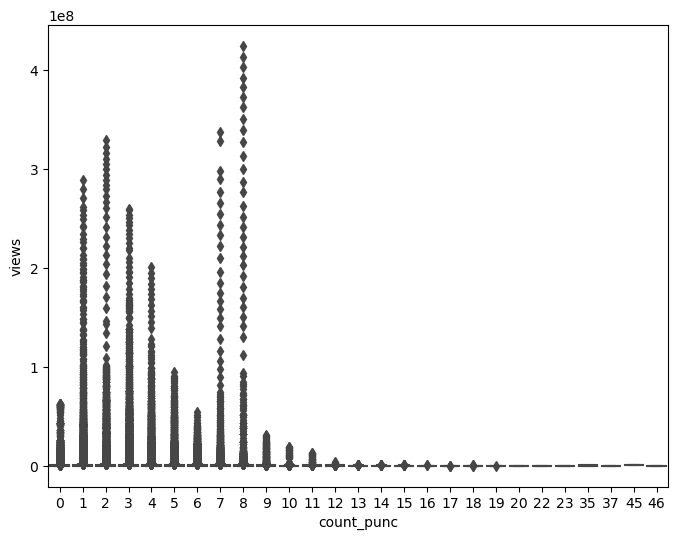

In [95]:
plt.figure(figsize= (8,6))
sns.boxplot(data = full_df, x = 'count_punc', y = 'views')
plt.xticks(rotation = 0)
plt.show()

Insights: Channels havig 8 punctuation marks can be seen as getting most views followed by 2,7 punctuation marks channels

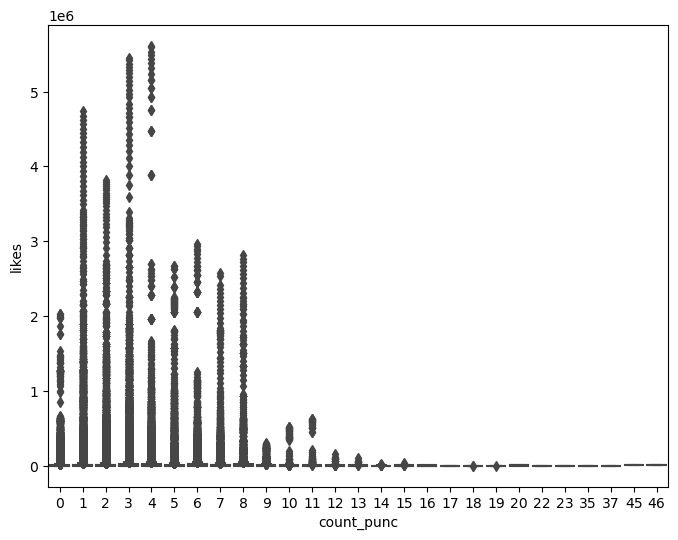

In [96]:
plt.figure(figsize= (8,6))
sns.boxplot(data = full_df, x = 'count_punc', y = 'likes')
plt.xticks(rotation = 0)
plt.show()

Insights: 1 and 3 punctuation marks titles has the most likes. Clearly evident titles having two to three punctuation marks will get most likes and views 